In [1]:
import zipfile

fl = zipfile.ZipFile('/content/dataset (1).zip')

fl.extractall()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
from tensorflow.keras import backend as K 
import numpy as np
np.random.seed(0)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [5]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/training_set',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary',shuffle=True)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/dataset/test_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',shuffle=True)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 6.6 MB/s 
     |████████████████████████████████| 381 kB 46.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [12]:
from livelossplot import PlotLossesKerasTF

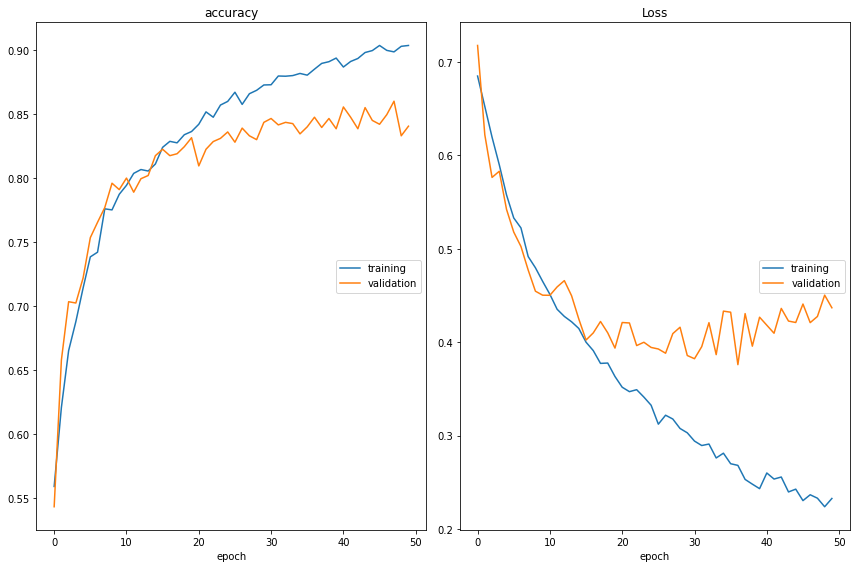

accuracy
	training         	 (min:    0.559, max:    0.904, cur:    0.904)
	validation       	 (min:    0.544, max:    0.860, cur:    0.840)
Loss
	training         	 (min:    0.224, max:    0.685, cur:    0.233)
	validation       	 (min:    0.376, max:    0.718, cur:    0.437)
375/375 [==============================] - 215s 572ms/step - loss: 0.2326 - accuracy: 0.9035 - val_loss: 0.4368 - val_accuracy: 0.8405


In [13]:
model.fit(
        train_generator,
        steps_per_epoch=6000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size,callbacks=[PlotLossesKerasTF()])


In [14]:
model.save_weights('first_try.h5')  # always save your weights after training or during training

In [17]:
model.save("pet_classification_model.h5")

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [36]:
img = load_img('/content/dataset/test_set/dogs/dog.4002.jpg',target_size=(150,150))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

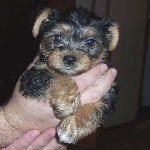

In [37]:
img

In [38]:
model.predict(x)

array([[1.]], dtype=float32)

In [44]:
tg = load_img('/content/dataset/test_set/cats/cat.4014.jpg',target_size=(150,150))  # this is a PIL image
f = img_to_array(tg)  # this is a Numpy array with shape (3, 150, 150)
f = f.reshape((1,) + f.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

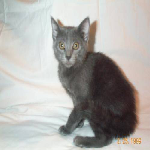

In [45]:
tg

In [46]:
np.round(model.predict(f)[0])

array([0.], dtype=float32)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

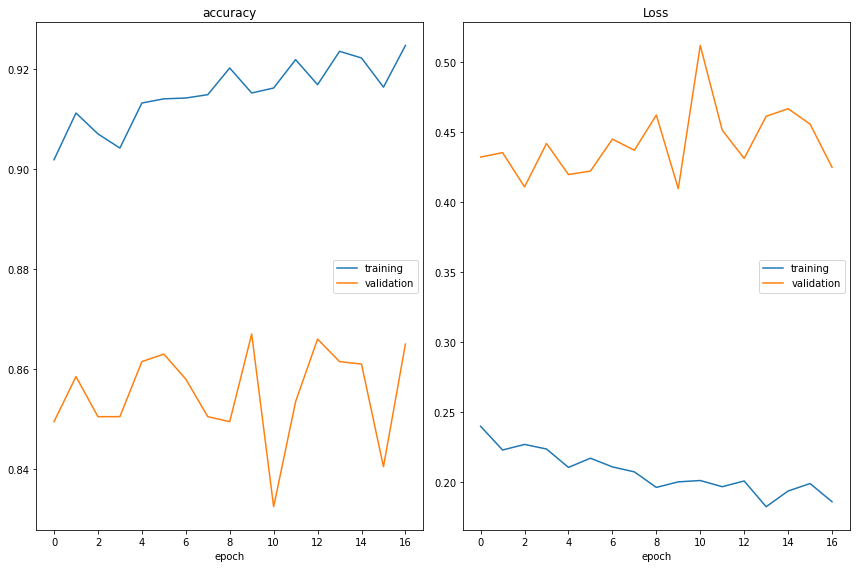

accuracy
	training         	 (min:    0.902, max:    0.925, cur:    0.925)
	validation       	 (min:    0.832, max:    0.867, cur:    0.865)
Loss
	training         	 (min:    0.182, max:    0.240, cur:    0.186)
	validation       	 (min:    0.410, max:    0.512, cur:    0.425)
375/375 [==============================] - 218s 581ms/step - loss: 0.1857 - accuracy: 0.9247 - val_loss: 0.4249 - val_accuracy: 0.8650
Epoch 18/100
156/375 [===========>..................] - ETA: 1:56 - loss: 0.1954 - accuracy: 0.9243

In [ ]:
### Running the model for 100 epoch

model.fit(
        train_generator,
        steps_per_epoch=6000 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size,callbacks=[PlotLossesKerasTF()])